In [24]:
import numpy as np
import cv2
import os
from google.colab.patches import cv2_imshow

# Define the Harris Corner Detection function
def HarrisCornerDetection(image):
    # Compute gradients using Sobel operators
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    # Calculate elements of the Harris matrix
    Ixx = sobel_x**2
    Ixy = sobel_x * sobel_y
    Iyy = sobel_y**2

    # Gaussian blur of the elements
    k_size = 5  # Adjust the kernel size as needed
    Ixx = cv2.GaussianBlur(Ixx, (k_size, k_size), 0)
    Ixy = cv2.GaussianBlur(Ixy, (k_size, k_size), 0)
    Iyy = cv2.GaussianBlur(Iyy, (k_size, k_size), 0)

    # Calculate the Harris response
    k = 0.04  # Harris corner coefficient, you can adjust this value
    det = Ixx * Iyy - Ixy**2
    trace = Ixx + Iyy
    R = det - k * trace**2

    return R

# Main Program
input_folder = "/content/Harris_Corner_Detection/Input"  # Change to the correct input folder name
output_folder = "/content/Harris_Corner_Detection/Output"  # Change to the correct output folder name

# Create the output directory if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Initialize lists to store input and output images
input_images = []
output_images = []

# Process all input images
for filename in os.listdir(input_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        input_image_path = os.path.join(input_folder, filename)
        output_image_path = os.path.join(output_folder, f"Output_{filename}")

        # Get the input image
        firstimage = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)
        w, h = firstimage.shape

        # Convert image to color to draw colored circles on it
        bgr = cv2.cvtColor(firstimage, cv2.COLOR_GRAY2RGB)

        # Corner detection
        R = HarrisCornerDetection(firstimage)

        # Empirical Parameter (Threshold)
        CornerStrengthThreshold = 600000

        # Plot detected corners on the image
        radius = 2
        color = (0, 255, 0)  # Green
        thickness = 2

        PointList = []

        # Look for Corner strengths above the threshold
        for row in range(w):
            for col in range(h):
                if R[row][col] > CornerStrengthThreshold:
                    max = R[row][col]

                    # Local non-maxima suppression
                    skip = False
                    for nrow in range(5):
                        for ncol in range(5):
                            if row + nrow - 2 < w and col + ncol - 2 < h:
                                if R[row + nrow - 2][col + ncol - 2] > max:
                                    skip = True
                                    break

                    if not skip:
                        # Point is expressed in x, y which is col, row
                        cv2.circle(bgr, (col, row), radius, color, thickness)
                        PointList.append((row, col))

        # Append input and output images to their respective lists
        input_images.append(firstimage)
        output_images.append(bgr)


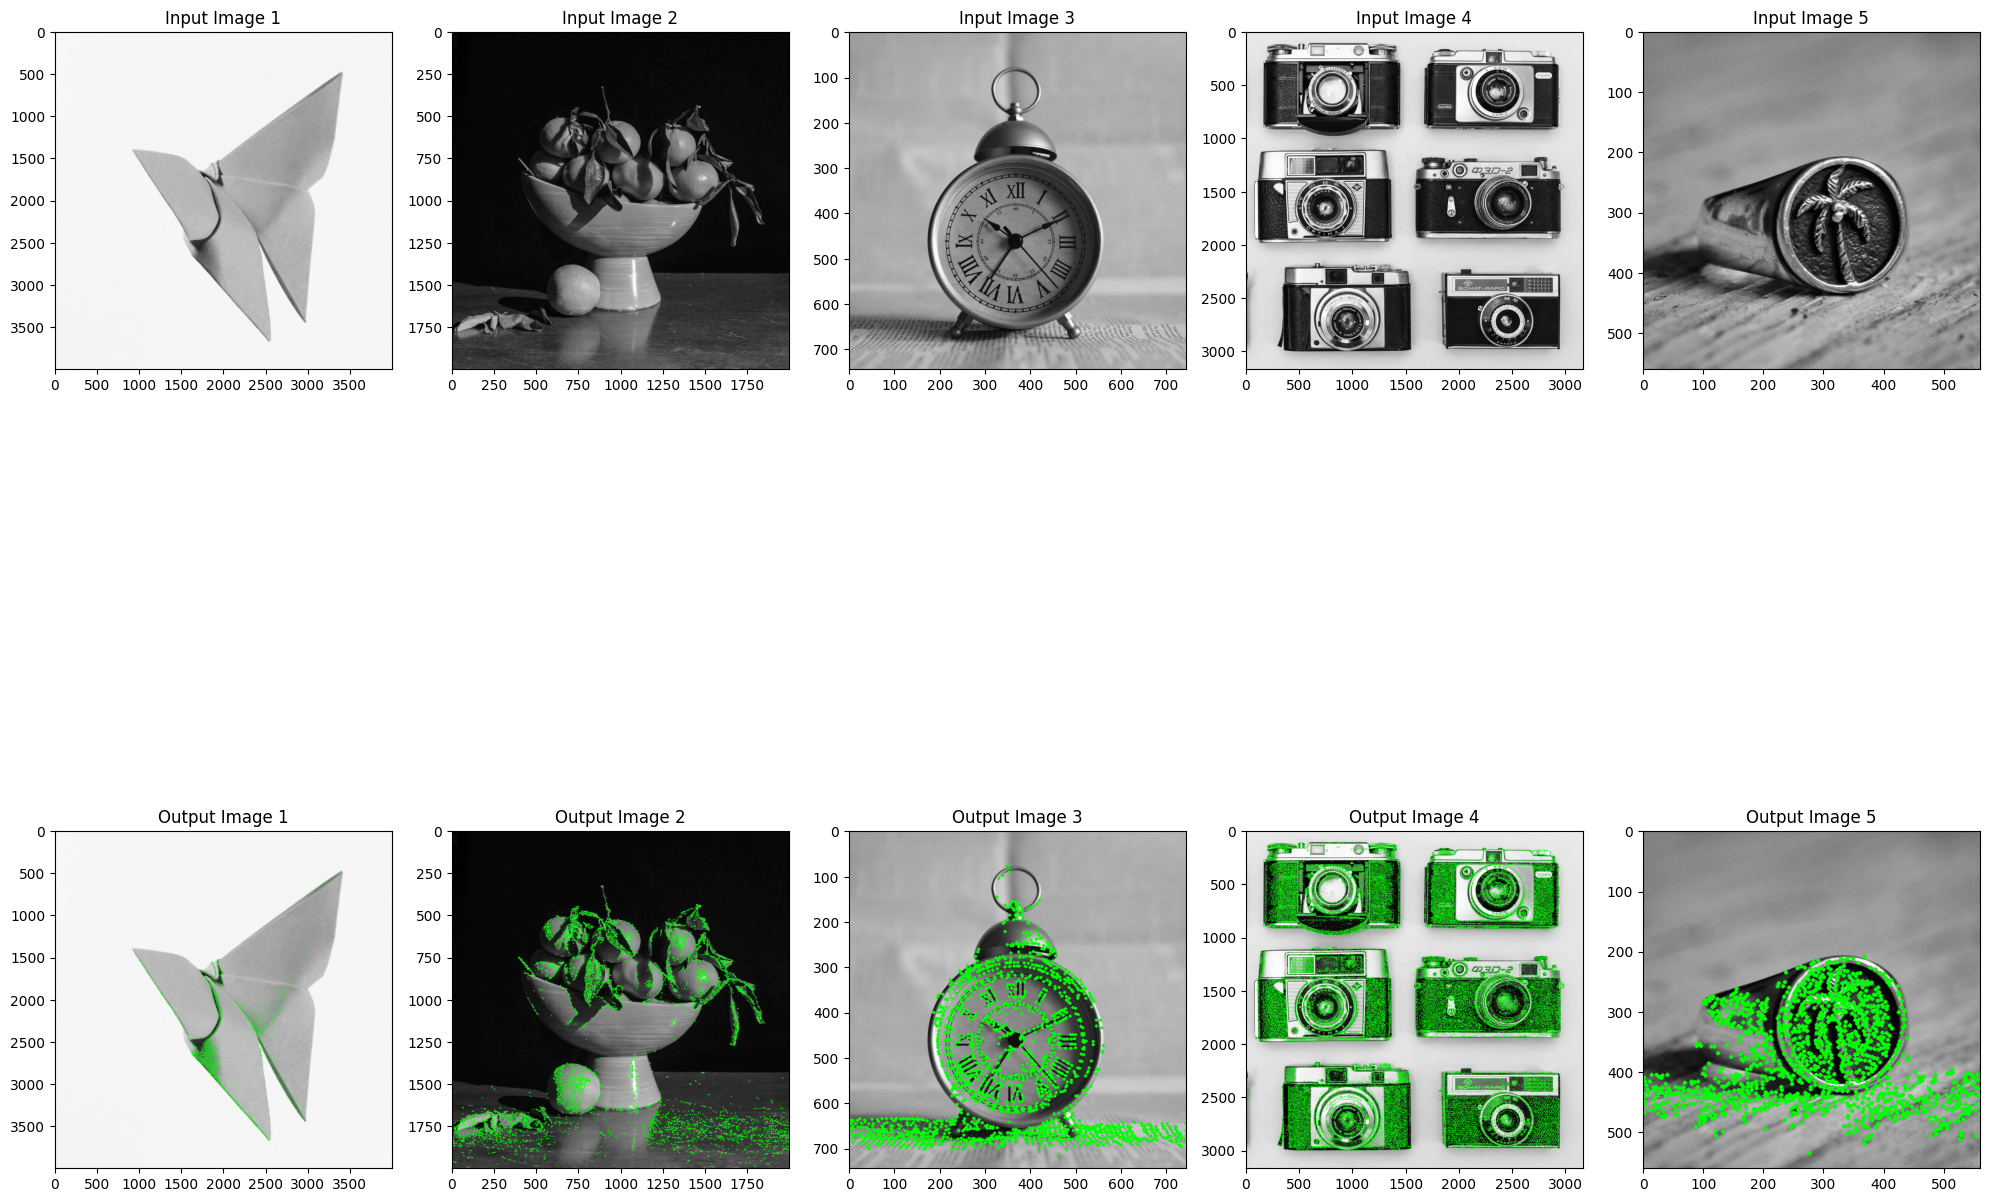

In [25]:
#Show all the input and Output images
import matplotlib.pyplot as plt

# Create a figure with subplots
plt.figure(figsize=(20, 20))

# Loop through input and output image pairs
for i, (input_img, output_img) in enumerate(zip(input_images, output_images), start=1):
    # Display input image
    plt.subplot(2, len(input_images), i)
    plt.imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB))
    plt.title(f'Input Image {i}')

    # Display output image
    plt.subplot(2, len(output_images), i + len(input_images))
    plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
    plt.title(f'Output Image {i}')

plt.tight_layout()
plt.show()
